# Classification of Credit Card Default Risk: A Machine Learning Approach

## Name: Ajay A L

## Overview of Problem Statement

In the banking and financial sector, credit risk is a major concern, as it directly impacts the profitability and sustainability of financial institutions. Banks issue credit cards to clients based on their financial standing and repayment capacity, but there is always a risk that clients may fail to pay their dues. This failure to pay (credit default) can result in significant losses for the bank.

The primary challenge is to accurately predict whether a credit card client will default on their payment in the next month based on their demographic details, financial history, and repayment behavior. Early identification of clients at high risk of default can help financial institutions take proactive measures to mitigate losses, such as adjusting credit limits, offering restructuring plans, or rejecting high-risk applications.

## Objectives

Predict Credit Default:
 Build a machine learning model that accurately predicts whether a client will default on their credit card payment in the next month, using demographic, financial, and repayment history data.

Identify Key Factors:
 Analyze and identify the most significant features (e.g., repayment status, credit limit, bill amounts) that influence the likelihood of credit default.

### Data Description

**Source:** From UCI ML Repository, link: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

**Features:** 
* **ID:** Id of the users.
* **LIMIT_BAL:** Amount of given credit.
* **SEX:** Sex of the customer.**(1= Male, 2= Female)**
* **EDUCATION:** Education level of customers **(1 = graduate school; 2 = university; 3 = high school; 4 = others)**
* **MARRIAGE:** Marital status **(1 = married; 2 = single; 3 = others)**
* **AGE:** Age of the customer.nth'

* **PAY_0:** Pay status of september.
* **PAY_2:** Pay status of August.
* **PAY_3:** Pay status of July.
* **PAY_4:** Pay Status of June.
* **PAY_5:** Pay status of May.
* **PAY_6:** Pay status of April.

**PAY_0 to PAY_6 contains values of -2 to 9
describes the status of repayment -2 = no payment; -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.**

* **BILL_AMT1:** Bill Amount of September.
* **BILL_AMT2:** Bill Amount of August.
* **BILL_AMT3:** Bill Amount of July.
* **BILL_AMT4:** Bill Amount of June.
* **BILL_AMT5:** Bill Amount of May.
* **BILL_AMT6:** Bill Amount of April.

* **PAY_AMT1:** Payed Amount in September.
* **PAY_AMT2:** Payed Amount in August.
* **PAY_AMT3:** Payed Amount in July.
* **PAY_AMT4:** Payed Amount in June.
* **PAY_AMT5:** Payed Amount in May.
* **PAY_AMT6:** Payed Amount in April.

* **default payment next month:** User defaulted the payment or not (1=Yes, 0=No). **Target Variable**

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')



### Data Collection

**Loading Data**

In [21]:
data = pd.read_csv('default of credit card clients.csv')

**Converting to Dataframe**

In [23]:
df = pd.DataFrame(data)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [24]:
df.head(10) #details of top 10 row

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


**Displaying information**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Checking shape of data**

In [28]:
df.shape

(30000, 25)

**Describing the details of the dataset**

In [30]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Displaying columns**

In [32]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**Checking Datatypes**

In [34]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [35]:
print(df['default payment next month'].dtype)

int64


### Data Cleaning and Preprocessing

**Checking for Duplicates**

In [38]:
df.duplicated() 

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [39]:
df.duplicated().sum()

0

**No duplicate values found in the Dataset**

**Finding and Handling null values**


In [42]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No Null values found in the dataset**

**Renaming some columns for better understanding**


In [45]:
df = df.rename(columns={
    'PAY_0': 'sept_paystat',
    'PAY_2': 'aug_paystat',
    'PAY_3': 'july_paystat',
    'PAY_4': 'june_paystat',
    'PAY_5': 'may_paystat',
    'PAY_6': 'april_paystat',
    'BILL_AMT1': 'sept_bill',
    'BILL_AMT2': 'aug_bill',
    'BILL_AMT3': 'july_bill',
    'BILL_AMT4': 'june_bill',
    'BILL_AMT5': 'may_bill',
    'BILL_AMT6': 'april_bill',
    'PAY_AMT1': 'sept_payment',
    'PAY_AMT2': 'aug_payment',
    'PAY_AMT3': 'july_payment',
    'PAY_AMT4': 'june_payment',
    'PAY_AMT5': 'may_payment',
    'PAY_AMT6': 'april_payment'
})


In [46]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Finding Numerical columns**

In [48]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [225]:
target_value_count = df['default payment next month'].value_counts() # Counting y variable counts

print(target_value_count)

default payment next month
0    23364
1     6636
Name: count, dtype: int64


**Boxplot for numerical columns**

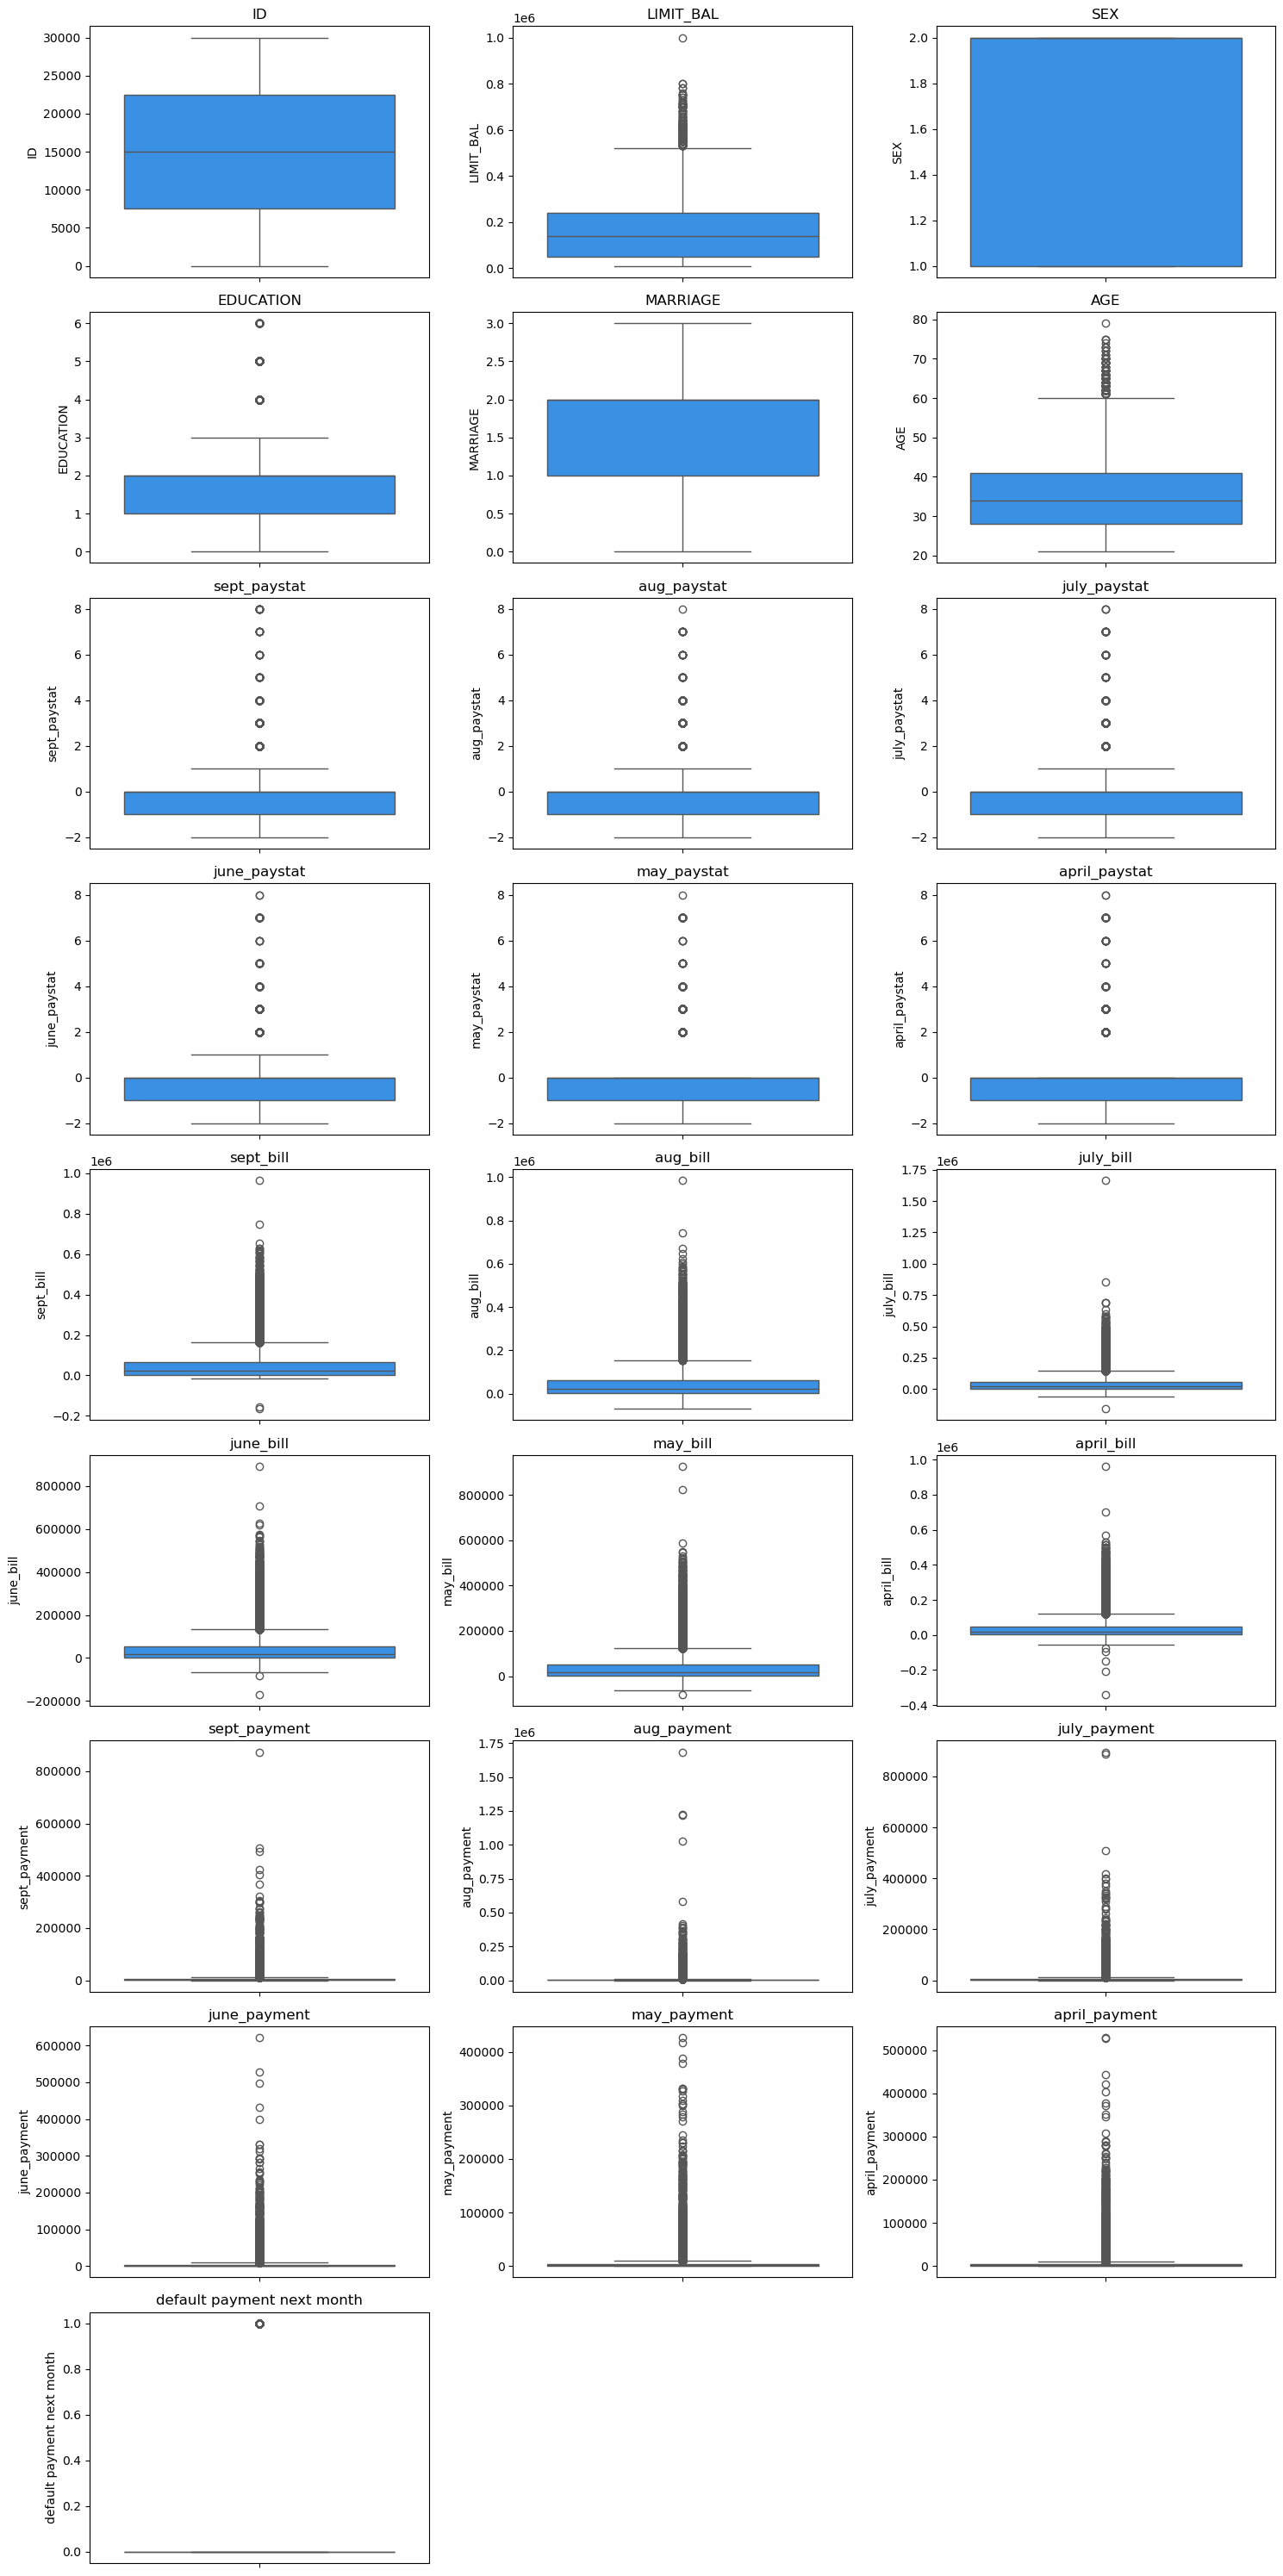

In [50]:
plt.figure(figsize=(15,30))
for i,col in enumerate(numerical_columns):
    plt.subplot(9,3,i+1)
    sns.boxplot(y=df[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

* **Since this is a classification model the target feature's outliers can be left unaltered.**
* **The paystat features contain values of predetermined range(-2 to 9)and have categorical behavior so those columns doesnt have true outliers**
* **Features like sex, Education , marriage has ordinal and binary encoded data, so outlier fixing is not a best practice**

**Selecting features which needed outlier fixing**

In [53]:
#Dropping ID column since it is not important
df = df.drop(columns=['ID'])


In [54]:
# These are the features having continues numerical values. (orginal value having categotical behaviour doesnt have true outliers)
outlier_fix_columns = [
    'LIMIT_BAL', 'AGE', 'sept_bill', 'aug_bill', 'july_bill', 
    'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'aug_payment', 
    'july_payment', 'june_payment', 'may_payment', 'april_payment'
]

**Visualizing outliers using boxplot**


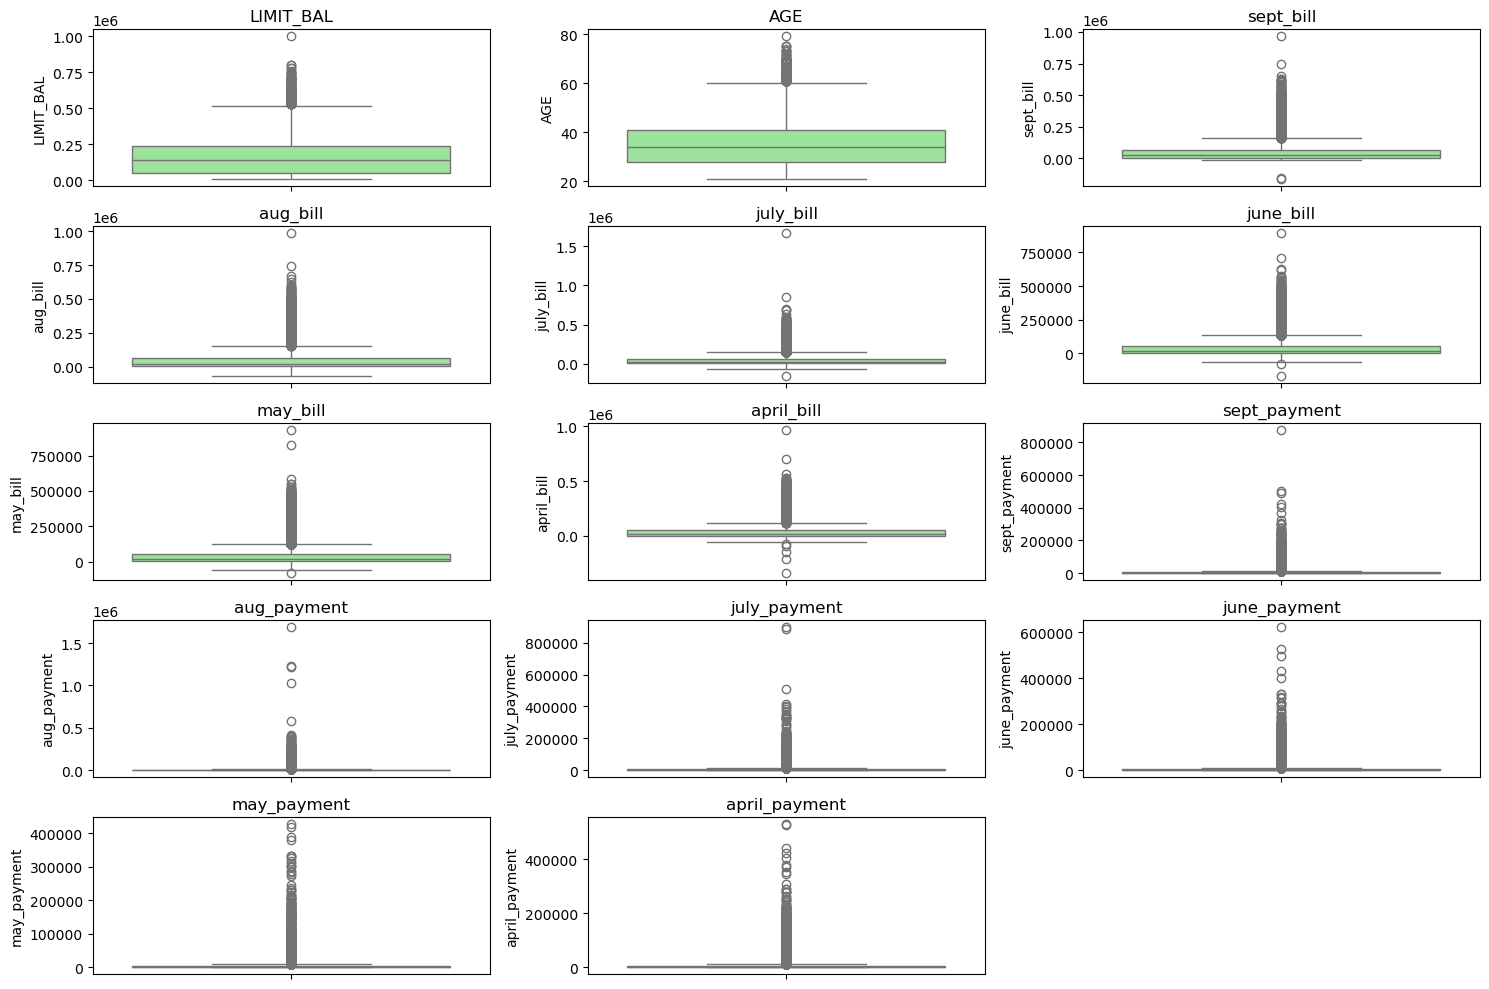

In [56]:
plt.figure(figsize=(15,10))
for i,col in enumerate(outlier_fix_columns):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

**Fixing Outliers using the IQR method**


In [58]:
for column in outlier_fix_columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower whisker
    upper_bound = Q3 + 1.5 * IQR    # Upper whisker
    
    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

**Visualizing after fixing outliers using IQR**

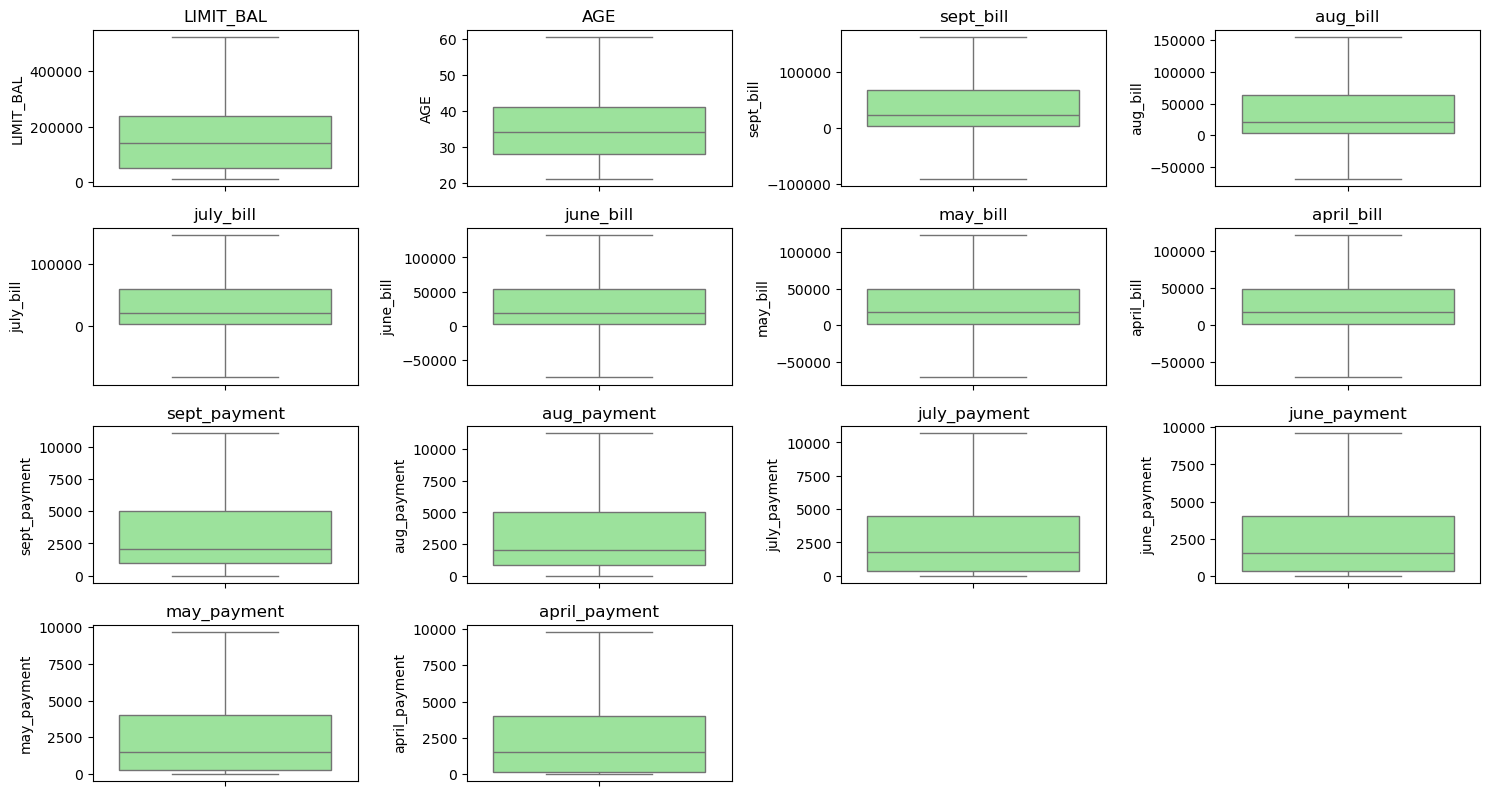

In [60]:
plt.figure(figsize=(15,10))
for i,col in enumerate(outlier_fix_columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

Features that needed Outlier Fixing has been handled Using IQR method

**Checking skewness of the data**

In [63]:
df[outlier_fix_columns].skew()

LIMIT_BAL        0.904504
AGE              0.654467
sept_bill        1.194178
aug_bill         1.189649
july_bill        1.184730
june_bill        1.183997
may_bill         1.184657
april_bill       1.199718
sept_payment     1.032414
aug_payment      1.113399
july_payment     1.200528
june_payment     1.176348
may_payment      1.183906
april_payment    1.211015
dtype: float64

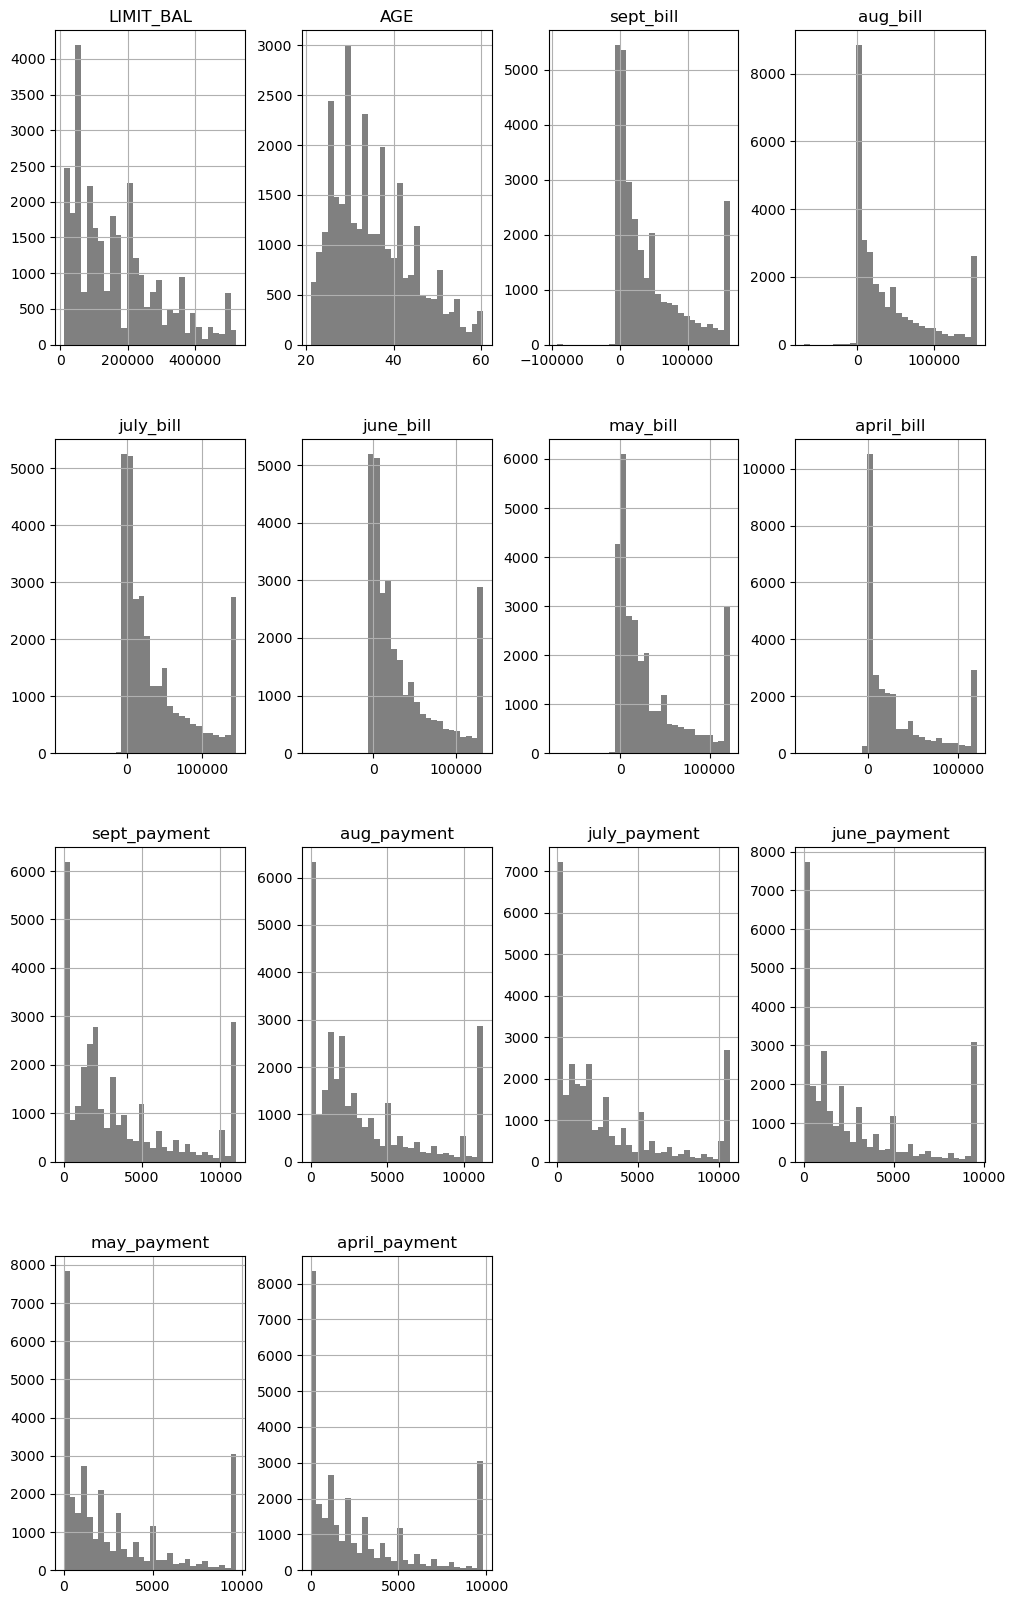

In [64]:
# Plot histograms before transformed features
df[outlier_fix_columns].hist(figsize=(12, 20), bins=30,color='grey')
plt.show()

**Applying square root transformation to fix skewness of needed features**


In [66]:

df[outlier_fix_columns] = np.sqrt(np.abs(df[outlier_fix_columns]) + 1)


In [67]:
print(df[outlier_fix_columns].skew())

LIMIT_BAL        0.247482
AGE              0.436065
sept_bill        0.437944
aug_bill         0.422110
july_bill        0.415432
june_bill        0.418846
may_bill         0.427006
april_bill       0.448018
sept_payment     0.095435
aug_payment      0.163805
july_payment     0.285515
june_payment     0.313511
may_payment      0.308738
april_payment    0.332968
dtype: float64


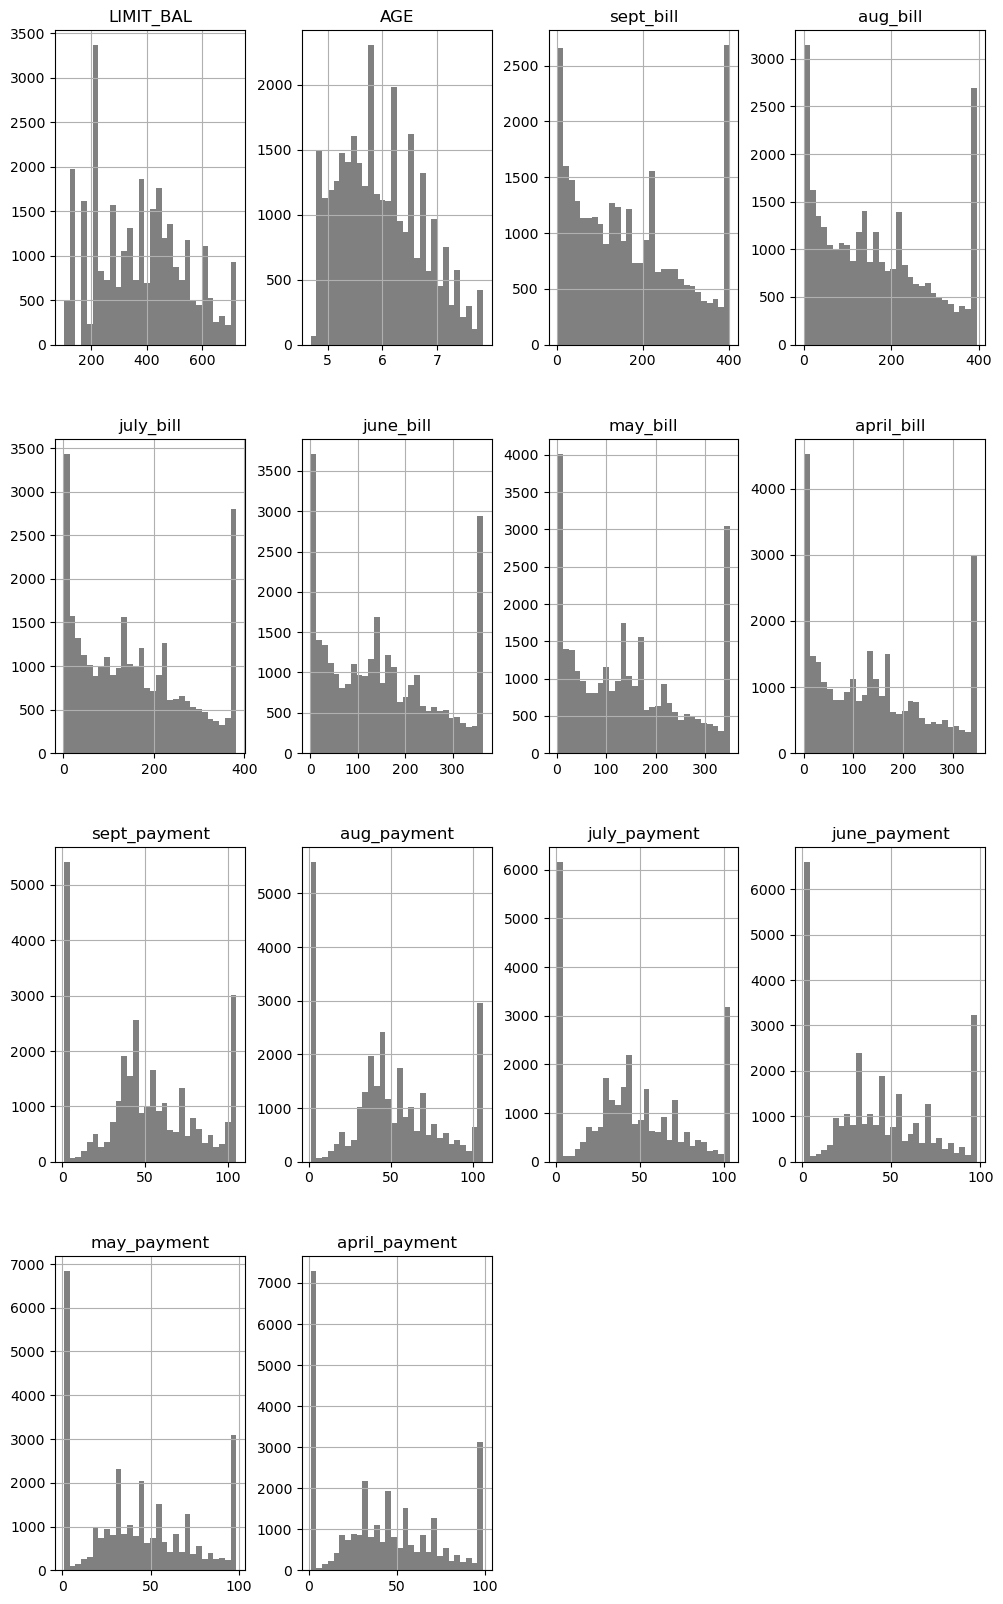

In [68]:
# Plot histograms After transformed features

df[outlier_fix_columns].hist(figsize=(12, 20), bins=30,color='grey')
plt.show()

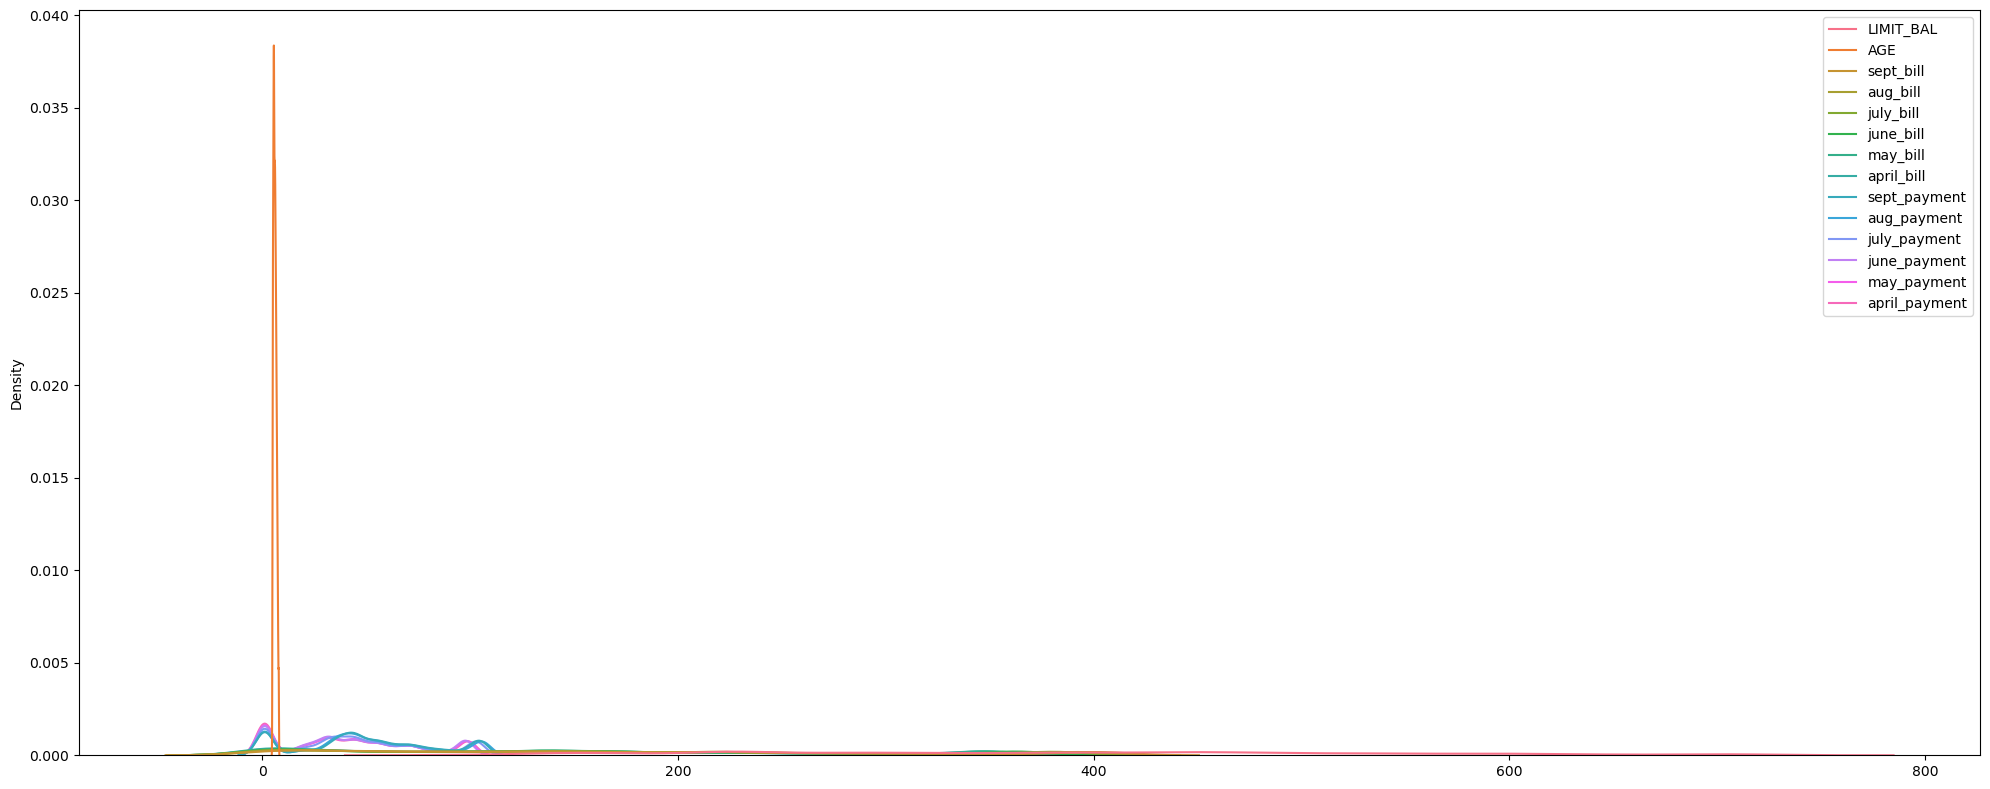

In [69]:
# Drawing KDE plot
plt.figure(figsize=(20,8))
sns.kdeplot(df[outlier_fix_columns])
plt.tight_layout()
plt.show()

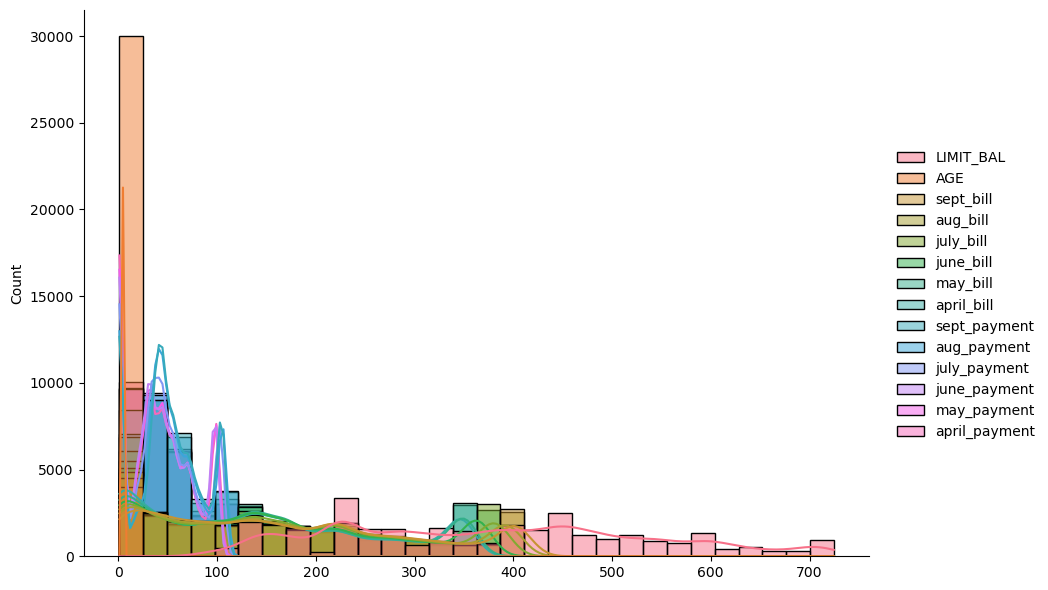

In [70]:
sns.displot(df[outlier_fix_columns], bins=30, kde=True, height=6, aspect=1.5)  # Create the distribution plot
